In [60]:
import pandas
import os
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [3]:
def MEWS_stander(line_data=None, thres = 4):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta):
        if v == "":
            dta[u] = -1
    # storetime HR ABPd RR SpO2 TemperatureF
    # RR
    dta[7] = float(dta[7])
    if dta[7] == -1: ret["score"] += 0
    elif dta[7] <= 8: ret["score"] += 2
    elif dta[7] <= 14: ret["score"] += 0
    elif dta[7] <= 20: ret["score"] += 1
    elif dta[7] <= 29: ret["score"] += 2
    else: ret["score"] += 3
    
    # ABPd/SBP
    dta[4] = float(dta[4])
    if dta[4] == -1: ret["score"] += 0
    elif dta[4] <= 70: ret["score"] += 3
    elif dta[4] <= 80: ret["score"] += 2
    elif dta[4] <= 100: ret["score"] += 1
    elif dta[4] <= 199: ret["score"] += 0
    elif dta[4] >= 200: ret["score"] += 2

    # HR
    dta[1] = float(dta[1])
    if dta[1] == -1: ret["score"] += 0
    elif dta[1] <= 40: ret["score"] += 2
    elif dta[1] <= 50: ret["score"] += 1
    elif dta[1] <= 100: ret["score"] += 0
    elif dta[1] <= 110: ret["score"] += 1
    elif dta[1] <= 129: ret["score"] += 2
    else: ret["score"] += 3

    # TemperatureF
    # TC = (float(dta[3]) - 32) * 5 / 9
    TC = float(dta[3])
    if dta[3] == -1: ret["score"] += 0
    elif TC <= 35: ret["score"] += 2
    elif TC <= 36: ret["score"] += 1
    elif TC <= 38: ret["score"] += 0
    elif TC <= 38.5: ret["score"] += 1
    else: ret["score"] += 2
    
    # We don't have Urine output
    # print("FL:", flag)
    if ret["score"] >= thres:
        ret["state"] = 1
    # print(ret)
    return ret

# NEWS2_stander()

In [4]:
def NEWS2_stander(line_data=None, thres = 5):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta):
        if v == "": dta[u] = -1
    # RR
    dta[7] = float(dta[7])
    if dta[7] == -1: ret["score"] += 0
    elif dta[7] <= 8: ret["score"] += 3
    elif dta[7] <= 11: ret["score"] += 1
    elif dta[7] <= 20: ret["score"] += 0
    elif dta[7] <= 24: ret["score"] += 2
    else: ret["score"] += 3
    # SpO2
    dta[2] = float(dta[2])
    if dta[2] == -1: ret["score"] += 0
    elif dta[2] <= 91: ret["score"] += 3
    elif dta[2] <= 93: ret["score"] += 2
    elif dta[2] <= 95: ret["score"] += 1
    # ABPd/SBP
    dta[4] = float(dta[4])
    if dta[4] == -1: ret["score"] += 0
    elif dta[4] <= 90: ret["score"] += 3
    elif dta[4] <= 100: ret["score"] += 2
    elif dta[4] <= 110: ret["score"] += 1
    elif dta[4] <= 219: ret["score"] += 0
    elif dta[4] >= 200: ret["score"] += 3
    # HR
    dta[1] = float(dta[1])
    if dta[1] == -1: ret["score"] += 0
    elif dta[1] <= 40: ret["score"] += 3
    elif dta[1] <= 50: ret["score"] += 1
    elif dta[1] <= 90: ret["score"] += 0
    elif dta[1] <= 110: ret["score"] += 1
    elif dta[1] <= 130: ret["score"] += 2
    else: ret["score"] += 3
    # TemperatureF
    TC = float(dta[3])
    if dta[3] == -1: ret["score"] += 0
    elif TC <= 35: ret["score"] += 3
    elif TC <= 36: ret["score"] += 1
    elif TC <= 38: ret["score"] += 0
    elif TC <= 39: ret["score"] += 1
    else: ret["score"] += 2
    # print("FL:", flag)
    if ret["score"] >= thres: ret["state"] = 1
    # print(ret)
    return ret

# NEWS2_stander()

In [5]:
def Sepsis3_stander(line_data=None):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta):
        if v == "":
            dta[u] = -1
    flag = False
    # storetime HR ABPd RR SpO2 TemperatureF
    # print(line_data)
    # RR
    # print(f"RR: {dta[7]}")
    f1, f2 = False, False
    dta[7] = float(dta[7])
    if dta[7] <= 22:
        ret["scorerr"] = 0
    else:
        ret["scorerr"] = 1
        f1 = True
    
    # ABPd/SBP
    # print(f"ABPd: {dta[4]}")
    dta[4] = float(dta[4])
    if dta[4] < 100 and dta[4] != -1:
        ret["scoreSBP"] = 1
        f2 = True
    else:
        ret["scoreSBP"] = 0
    
    # print("FL:", flag)
    if f1 and f2:
        ret["state"] = 1
    else:
        ret["state"] = 0
    # print(ret)
    return ret

# NEWS2_stander()

In [6]:
def NEWS_stander(line_data=None, thres = 5):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta):
        if v == "":
            dta[u] = -1
    flag = False
    # storetime HR ABPd RR SpO2 TemperatureF
    # print(line_data)
    # RR
    # print(f"RR: {dta[7]}")
    dta[7] = float(dta[7])
    if dta[7] == -1: ret["score"] += 0
    elif dta[7] <= 8: ret["score"] += 3
    elif dta[7] <= 11: ret["score"] += 1
    elif dta[7] <= 20: ret["score"] += 0
    elif dta[7] <= 24: ret["score"] += 2
    else: ret["score"] += 3

    # SpO2
    # print(f"SpO2: {dta[2]}")
    dta[2] = float(dta[2])
    if dta[2] == -1: ret["score"] += 0
    elif dta[2] <= 91: ret["score"] += 3
    elif dta[2] <= 93: ret["score"] += 2
    elif dta[2] <= 95: ret["score"] += 1
    
    # ABPd/SBP
    # print(f"ABPd: {dta[4]}")
    dta[4] = float(dta[4])
    if dta[4] == -1: ret["score"] += 0
    elif dta[4] <= 90: ret["score"] += 3
    elif dta[4] <= 100: ret["score"] += 2
    elif dta[4] <= 110: ret["score"] += 1
    elif dta[4] <= 219: ret["score"] += 0
    elif dta[4] >= 220: ret["score"] += 3

    # HR
    # print(f"HR: {dta[1]}")
    dta[1] = float(dta[1])
    if dta[1] == -1: ret["score"] += 0
    elif dta[1] <= 40: ret["score"] += 3
    elif dta[1] <= 50: ret["score"] += 1
    elif dta[1] <= 90: ret["score"] += 0
    elif dta[1] <= 110: ret["score"] += 1
    elif dta[1] <= 130: ret["score"] += 2
    else: ret["score"] += 3

    # TemperatureF
    # print(f"TF: {dta[3]}")
    # TC = (float(dta[3]) - 32) * 5 / 9
    TC = float(dta[3])
    if dta[3] == -1: ret["score"] += 0
    elif TC <= 35: ret["score"] += 3
    elif TC <= 36: ret["score"] += 1
    elif TC <= 38: ret["score"] += 0
    elif TC <= 39: ret["score"] += 1
    else: ret["score"] += 2
    
    # print("FL:", flag)
    if ret["score"] >= thres:
        ret["state"] = 1
    # print(ret)
    return ret

# NEWS2_stander()

In [7]:
def SIRS_stander(line_data=None, thres = 2):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta):
        if v == "":
            dta[u] = -1
    flag = False
    # storetime HR ABPd RR SpO2 TemperatureF
    # print(line_data)
    # RR
    # print(f"RR: {dta[7]}")
    dta[7] = float(dta[7])
    dta[17] = float(dta[17])
    if dta[7] >= 20 or dta[17] < 100: ret["score"] += 1
    

    # HR
    # print(f"HR: {dta[1]}")
    dta[1] = float(dta[1])
    if dta[1] >= 90 : ret["score"] += 1

    # TemperatureF
    # print(f"TF: {dta[3]}")
    # TC = (float(dta[3]) - 32) * 5 / 9
    TC = float(dta[3])
    if TC < 36: ret["score"] += 1
    elif TC > 38: ret["score"] += 1
    
    # print("FL:", flag)
    if ret["score"] >= thres: ret["state"] = 1
    # print(ret)
    return ret

# NEWS2_stander()

In [8]:
def qSOFA_stander(line_data=None, thres = 2):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta):
        if v == "":
            dta[u] = -1
    # storetime HR ABPd RR SpO2 TemperatureF
    # RR
    dta[7] = float(dta[7])
    if dta[7] >= 22: ret["score"] += 1
    
    # ABPd/SBP
    dta[4] = float(dta[4])
    if dta[4] == -1: ret["score"] += 0
    elif dta[4] <= 100: ret["score"] += 1

    # We don't have GCS
    
    # print("FL:", flag)
    if ret["score"] >= thres: ret["state"] = 1
    # print(ret)
    return ret

# NEWS2_stander()

In [9]:
def SOFA_stander(line_data=None, thres = 2):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta): 
        if v == "":     dta[u] = -1
    
    # ABPd/MAP
    # print(f"ABPd: {dta[5]}")
    dta[5] = float(dta[5])
    if dta[5] == -1: ret["score"] += 0
    elif dta[5] <= 70: ret["score"] += 1

    # Platelets
    # print(f"Platelets: {dta[18]}")
    dta[18] = float(dta[18])
    if dta[18] == -1: ret["score"] += 0
    elif dta[18] <= 20: ret["score"] += 4
    elif dta[18] <= 50: ret["score"] += 3
    elif dta[18] <= 100: ret["score"] += 2
    elif dta[18] <= 150: ret["score"] += 1

    # Bilirubin
    # print(f"Bilirubin: {dta[22]}")
    dta[22] = float(dta[22])
    if dta[22] == -1: ret["score"] += 0
    elif dta[22] <= 1.2: ret["score"] += 0
    elif dta[22] <= 1.9: ret["score"] += 1
    elif dta[22] <= 5.9: ret["score"] += 2
    elif dta[22] <= 11.9: ret["score"] += 3
    else: ret["score"] += 4

    # Creatinine
    # print(f"Creatinine: {dta[33]}")
    dta[33] = float(dta[33])
    if dta[33] == -1: ret["score"] += 0
    elif dta[33] <= 1.2: ret["score"] += 0
    elif dta[33] <= 1.9: ret["score"] += 1
    elif dta[33] <= 3.4: ret["score"] += 2
    elif dta[33] <= 4.9: ret["score"] += 3
    else: ret["score"] += 4

    if ret["score"] >= thres: ret["state"] = 1
    # print(ret)
    return ret

# NEWS2_stander()

In [10]:
def APACHE_stander(line_data=None, thres = 15):
    dta = line_data.split(',')
    ret = dict(score = 0, state = 0)
    for u, v in enumerate(dta):
        if v == "": dta[u] = -1
    flag = False
    # storetime HR ABPd RR SpO2 TemperatureF
    # print(line_data)
    # RR
    # print(f"RR: {dta[7]}")
    dta[7] = float(dta[7])
    if dta[7] == -1: ret["score"] += 0
    elif dta[7] <= 5: ret["score"] += 4
    elif dta[7] <= 9: ret["score"] += 2
    elif dta[7] <= 11: ret["score"] += 1
    elif dta[7] <= 24: ret["score"] += 0
    elif dta[7] <= 34: ret["score"] += 1
    elif dta[7] <= 49: ret["score"] += 3
    else: ret["score"] += 4
    
    # ABPd/MAP
    # print(f"ABPd: {dta[5]}")
    dta[5] = float(dta[5])
    if dta[5] == -1: ret["score"] += 0
    elif dta[5] <= 49: ret["score"] += 4
    elif dta[5] <= 69: ret["score"] += 2
    elif dta[5] <= 109: ret["score"] += 0
    elif dta[5] <= 139: ret["score"] += 2
    elif dta[5] >= 179: ret["score"] += 3
    else: ret["score"] += 4

    # HR
    # print(f"HR: {dta[1]}")
    dta[1] = float(dta[1])
    if dta[1] == -1: ret["score"] += 0
    elif dta[1] <= 39: ret["score"] += 4
    elif dta[1] <= 54: ret["score"] += 3
    elif dta[1] <= 69: ret["score"] += 2
    elif dta[1] <= 109: ret["score"] += 0
    elif dta[1] <= 139: ret["score"] += 2
    elif dta[1] <= 179: ret["score"] += 3
    else: ret["score"] += 4

    # TemperatureF
    # print(f"TF: {dta[3]}")
    # TC = (float(dta[3]) - 32) * 5 / 9
    TC = float(dta[3])
    if dta[3] == -1: ret["score"] += 0
    elif TC <= 29.9: ret["score"] += 4
    elif TC <= 31.9: ret["score"] += 3
    elif TC <= 33.9: ret["score"] += 2
    elif TC <= 35.9: ret["score"] += 1
    elif TC <= 38.4: ret["score"] += 0
    elif TC <= 38.9: ret["score"] += 1
    elif TC <= 40.9: ret["score"] += 3
    else: ret["score"] += 4
    
    
    # pH
    # print(f"pH: {dta[14]}")
    dta[14] = float(dta[14])
    if dta[14] == -1: ret["score"] += 0
    elif dta[14] <= 7.15: ret["score"] += 4
    elif dta[14] <= 7.24: ret["score"] += 3
    elif dta[14] <= 7.32: ret["score"] += 2
    elif dta[14] <= 7.49: ret["score"] += 0
    elif dta[14] <= 7.59: ret["score"] += 1
    elif dta[14] <= 7.69: ret["score"] += 3
    else: ret["score"] += 4

    # HCO3
    # print(f"HCO3: {dta[15]}")
    dta[15] = float(dta[15])
    if dta[15] == -1: ret["score"] += 0
    elif dta[15] <= 15: ret["score"] += 4
    elif dta[15] <= 17.9: ret["score"] += 3
    elif dta[15] <= 21.9: ret["score"] += 2
    elif dta[15] <= 31.9: ret["score"] += 0
    elif dta[15] <= 40.9: ret["score"] += 1
    elif dta[15] <= 51.9: ret["score"] += 3
    else: ret["score"] += 4

    # don't have sodium

    # Potassium
    # print(f"Potassium: {dta[21]}")
    dta[21] = float(dta[21])
    if dta[21] == -1: ret["score"] += 0
    elif dta[21] <= 2.5: ret["score"] += 4
    elif dta[21] <= 2.9: ret["score"] += 2
    elif dta[21] <= 3.4: ret["score"] += 1
    elif dta[21] <= 5.4: ret["score"] += 0
    elif dta[21] <= 5.9: ret["score"] += 1
    elif dta[21] <= 6.9: ret["score"] += 3
    else: ret["score"] += 4

    # Creatinine
    # print(f"Creatinine: {dta[33]}")
    dta[33] = float(dta[33])
    if dta[33] == -1: ret["score"] += 0
    elif dta[33] <= 0.6: ret["score"] += 2
    elif dta[33] <= 1.4: ret["score"] += 0
    elif dta[33] <= 1.9: ret["score"] += 2
    elif dta[33] <= 3.4: ret["score"] += 3
    else: ret["score"] += 4
    
    # don't have Hematocrit
    # don't have White blood cell count
    # print("FL:", flag)
    if ret["score"] >= thres:
        ret["state"] = 1
    # print(ret)
    return ret

# NEWS2_stander()

In [116]:
def get_data(file_name):
    f = open(f"./{file_name}")
    o = open(f"./out/{file_name}", "w")
    line = f.readlines()
    cnt_NAME = ["APACHE", "MEWS", "NEWS", "NEWS2", "SIRS", "SOFA", "qSOFA", "Sepsis3"]

    add_line = ""
    for idx in cnt_NAME:
        add_line += f",{idx}_state"
    o.write(f"{line[0][:-1]}{add_line}\n")

    print(len(line[1:]))
    cnt_function = [eval(f"{name}_stander") for name in cnt_NAME]
    cnt_total = {key: 0 for key in cnt_NAME}
    cnt_diff = {key: 0 for key in cnt_NAME}
    cnt_difft = {key: 0 for key in cnt_NAME}
    cnt_tdiff = {key: 0 for key in cnt_NAME}
    thres = [15, 4, 5, 5, 2, 2, 2, 2]
    # for indicator_id in range(1):
    # for ind in range(7):
    #     ind_range_cnt = {key+thres[0]: 0 for key in range(-3, 4)}
    #     for eposion in tqdm(range(-3, 4)):
    #         for line_data in line[1:]:
    #             ret = [cnt_function[ind](line_data, thres[0] + eposion), Sepsis3_stander(line_data)]
    #             ind_range_cnt[thres[0] + eposion] += ret[0]['state'] != ret[1]['state']
    #     print(cnt_NAME[ind], ind_range_cnt)
    # print(cnt)
    for line_data in tqdm(line[1:]):
        add_line = ""
        dic_list = []
        for idx in range(8):
            dic_list.append(cnt_function[idx](line_data))
            add_line+=f",{dic_list[idx]['state']}"

        for idx in range(8):
            cnt_total[cnt_NAME[idx]] += (dic_list[idx]['state'])
            cnt_diff[cnt_NAME[idx]] += (dic_list[idx]['state'] != dic_list[7]['state'])
            cnt_difft[cnt_NAME[idx]] += (dic_list[idx]['state'] and not dic_list[7]['state'])
            cnt_tdiff[cnt_NAME[idx]] += (not dic_list[idx]['state'] and dic_list[7]['state'])
        o.write(f'{line_data[:-1]}{add_line}\n')
    # print(cnt)
        # cnt[cnt_NAME] += 
        # if dic["state"]!= "low":
            # print(dic)
    return cnt_total, cnt_diff, cnt_difft, cnt_tdiff

In [119]:
def get_maxvalue(file_name):
    f = open(f"./{file_name}")
    o = open(f"./out/{file_name}", "w")
    line = f.readlines()
    cnt_NAME = ["APACHE", "MEWS", "NEWS", "NEWS2", "SIRS", "SOFA", "qSOFA", "Sepsis3"]

    add_line = ""
    for idx in cnt_NAME:
        add_line += f",{idx}_state"
    o.write(f"{line[0][:-1]}{add_line}\n")

    print(len(line[1:]))
    cnt_function = [eval(f"{name}_stander") for name in cnt_NAME]
    thres = [15, 4, 5, 5, 2, 2, 2, 2]
    ans = []
    for ind in trange(7):
        ind_range_cnt = [{key+thres[ind]: 0 for key in range(-3, 4)} for _ in range(4)]
        for eposion in trange(-3, 4):
            for line_data in line[1:]:
                ret = [cnt_function[ind](line_data, thres[ind] + eposion), Sepsis3_stander(line_data)]
                ind_range_cnt[0][thres[ind] + eposion] += (ret[0]['state'] != ret[1]['state']) # 兩者不同
                ind_range_cnt[1][thres[ind] + eposion] += (ret[0]['state'] and not ret[1]['state']) # 誤標到
                ind_range_cnt[2][thres[ind] + eposion] += (not ret[0]['state'] and ret[1]['state']) # 標準沒有標到
                ind_range_cnt[3][thres[ind] + eposion] += ret[0]['state'] # 總共標到的 
        print(cnt_NAME[ind], ind_range_cnt)
        ans.append((cnt_NAME[ind], ind_range_cnt.copy()))
        # ind_range_cnt.clear()
    return ans

# The data what We should focus
,storetime,HR,ABPs,ABPd,ABPm,RR,SpO2,TemperatureF,EtCO2,weight,Gender,Age、

- stroetime : 記錄時間
- ***HR : heart rate : 心跳***
- ***ABP : 血壓***
- 收縮動脈壓 (ABPs)、比較兩組舒張壓(ABPd)、平均動脈壓(ABPm)
- ***RR : Respiratory rate : 呼吸頻率***
- ***SpO2: 血氧飽和度***
- ***TemperatureF: 體溫 華氏***
- EtCO2 : 吐出的CO2的容積量
- 體重/性別/年齡

1, 2, 4, 6, 7, 8

In [120]:
# for file_name in os.listdir("./test_data"):
    # print(file_name)
    # get_data(f"test_data/{file_name}")
file = os.listdir("./test_data2")
file.sort()
print(file)
# get_data(f"test_data/{file[0]}")
for file_name in file:
    ans_data2 = get_data(f"test_data2/{file_name}")
    ans_data = get_maxvalue(f"test_data2/{file_name}")

['merge_data2.csv']
1529225


100%|██████████| 1529225/1529225 [00:58<00:00, 26298.78it/s]


1529225


 14%|█▍        | 1/7 [01:33<09:19, 93.25s/it]

APACHE [{12: 237273, 13: 165186, 14: 132310, 15: 88569, 16: 74696, 17: 55928, 18: 50407}, {12: 203283, 13: 128846, 14: 93809, 15: 48597, 16: 33680, 17: 14169, 18: 8072}, {12: 33990, 13: 36340, 14: 38501, 15: 39972, 16: 41016, 17: 41759, 18: 42335}, {12: 212537, 13: 135750, 14: 98552, 15: 51869, 16: 35908, 17: 15654, 18: 8981}]


 29%|██▊       | 2/7 [02:52<07:04, 84.81s/it]

MEWS [{1: 1323145, 2: 755615, 3: 308211, 4: 139898, 5: 69844, 6: 48338, 7: 43541}, {1: 1323145, 2: 755615, 3: 308211, 4: 123062, 5: 42406, 6: 12770, 7: 3628}, {1: 0, 2: 0, 3: 0, 4: 16836, 5: 27438, 6: 35568, 7: 39913}, {1: 1366389, 2: 798859, 3: 351455, 4: 149470, 5: 58212, 6: 20446, 7: 6959}]


 43%|████▎     | 3/7 [04:15<05:37, 84.37s/it]

NEWS [{2: 829230, 3: 559938, 4: 323159, 5: 169273, 6: 89388, 7: 55231, 8: 44016}, {2: 829230, 3: 559938, 4: 323159, 5: 166105, 6: 77340, 7: 32198, 8: 12308}, {2: 0, 3: 0, 4: 0, 5: 3168, 6: 12048, 7: 23033, 8: 31708}, {2: 872474, 3: 603182, 4: 366403, 5: 206181, 6: 108536, 7: 52409, 8: 23844}]


 57%|█████▋    | 4/7 [05:37<04:10, 83.42s/it]

NEWS2 [{2: 829233, 3: 559941, 4: 323163, 5: 169276, 6: 89391, 7: 55233, 8: 44016}, {2: 829233, 3: 559941, 4: 323163, 5: 166108, 6: 77343, 7: 32200, 8: 12308}, {2: 0, 3: 0, 4: 0, 5: 3168, 6: 12048, 7: 23033, 8: 31708}, {2: 872477, 3: 603185, 4: 366407, 5: 206184, 6: 108539, 7: 52411, 8: 23844}]


 71%|███████▏  | 5/7 [06:49<02:38, 79.17s/it]

SIRS [{-1: 1485981, 0: 1485981, 1: 1485968, 2: 663736, 3: 114561, 4: 43244, 5: 43244}, {-1: 1485981, 0: 1485981, 1: 1485968, 2: 648610, 3: 76391, 4: 0, 5: 0}, {-1: 0, 0: 0, 1: 0, 2: 15126, 3: 38170, 4: 43244, 5: 43244}, {-1: 1529225, 0: 1529225, 1: 1529212, 2: 676728, 3: 81465, 4: 0, 5: 0}]


 86%|████████▌ | 6/7 [08:06<01:18, 78.40s/it]

SOFA [{-1: 1485981, 0: 1485981, 1: 939186, 2: 578466, 3: 376152, 4: 270832, 5: 141638}, {-1: 1485981, 0: 1485981, 1: 933746, 2: 558731, 3: 348586, 4: 238088, 5: 105233}, {-1: 0, 0: 0, 1: 5440, 2: 19735, 3: 27566, 4: 32744, 5: 36405}, {-1: 1529225, 0: 1529225, 1: 971550, 2: 582240, 3: 364264, 4: 248588, 5: 112072}]


100%|██████████| 7/7 [09:12<00:00, 78.94s/it]

qSOFA [{-1: 1485981, 0: 1485981, 1: 503998, 2: 15874, 3: 43244, 4: 43244, 5: 43244}, {-1: 1485981, 0: 1485981, 1: 503998, 2: 15874, 3: 0, 4: 0, 5: 0}, {-1: 0, 0: 0, 1: 0, 2: 0, 3: 43244, 4: 43244, 5: 43244}, {-1: 1529225, 0: 1529225, 1: 547242, 2: 59118, 3: 0, 4: 0, 5: 0}]


[237273, 165186, 132310, 88569, 74696, 55928, 50407]
[203283, 128846, 93809, 48597, 33680, 14169, 8072]
[33990, 36340, 38501, 39972, 41016, 41759, 42335]
[212537, 135750, 98552, 51869, 35908, 15654, 8981]


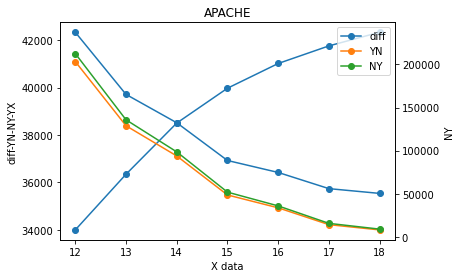

[1323145, 755615, 308211, 139898, 69844, 48338, 43541]
[1323145, 755615, 308211, 123062, 42406, 12770, 3628]
[0, 0, 0, 16836, 27438, 35568, 39913]
[1366389, 798859, 351455, 149470, 58212, 20446, 6959]


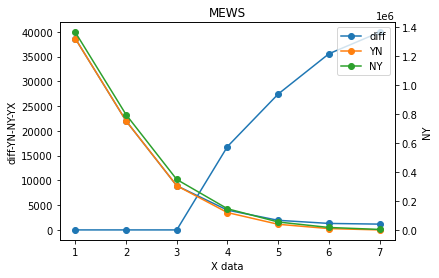

[829230, 559938, 323159, 169273, 89388, 55231, 44016]
[829230, 559938, 323159, 166105, 77340, 32198, 12308]
[0, 0, 0, 3168, 12048, 23033, 31708]
[872474, 603182, 366403, 206181, 108536, 52409, 23844]


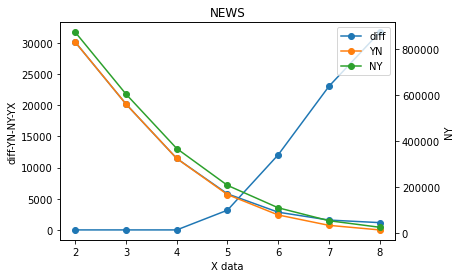

[829233, 559941, 323163, 169276, 89391, 55233, 44016]
[829233, 559941, 323163, 166108, 77343, 32200, 12308]
[0, 0, 0, 3168, 12048, 23033, 31708]
[872477, 603185, 366407, 206184, 108539, 52411, 23844]


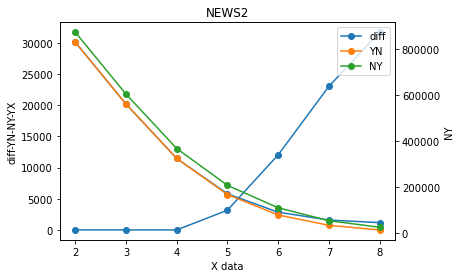

[1485981, 1485981, 1485968, 663736, 114561, 43244, 43244]
[1485981, 1485981, 1485968, 648610, 76391, 0, 0]
[0, 0, 0, 15126, 38170, 43244, 43244]
[1529225, 1529225, 1529212, 676728, 81465, 0, 0]


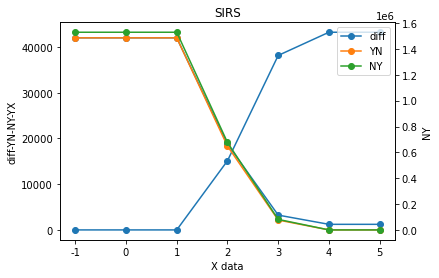

[1485981, 1485981, 939186, 578466, 376152, 270832, 141638]
[1485981, 1485981, 933746, 558731, 348586, 238088, 105233]
[0, 0, 5440, 19735, 27566, 32744, 36405]
[1529225, 1529225, 971550, 582240, 364264, 248588, 112072]


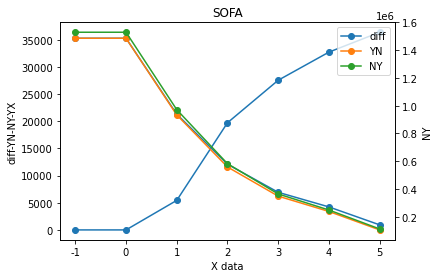

[1485981, 1485981, 503998, 15874, 43244, 43244, 43244]
[1485981, 1485981, 503998, 15874, 0, 0, 0]
[0, 0, 0, 0, 43244, 43244, 43244]
[1529225, 1529225, 547242, 59118, 0, 0, 0]


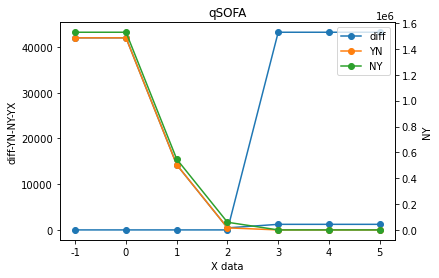

In [134]:
state_list = ["diff", "YN", "NY", "YX"]
for N, LST in ans_data:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_xlabel('X data')
    ax1.set_ylabel('-'.join(state_list))
    ax2.set_ylabel(state_list[-2])
    for D, sub_name in zip(LST, state_list):
        plt.title(N)
        Dlist = list(D.values())
        out = [Dlist[idx] for idx in range(len(D.values()))]
        (ax1 if sub_name == 'NY' else ax2).plot(range(len(D)), out, "o-")
        # print(D2list)
        print(out)
        plt.xticks(range(len(D)), list(D.keys()))
    plt.legend(state_list)
    plt.savefig(f"./src/pic/{N}.png")
    plt.show()

In [137]:
print(ans_data2)

({'APACHE': 51869, 'MEWS': 149470, 'NEWS': 206181, 'NEWS2': 206184, 'SIRS': 676728, 'SOFA': 582240, 'qSOFA': 59118, 'Sepsis3': 43244}, {'APACHE': 88569, 'MEWS': 139898, 'NEWS': 169273, 'NEWS2': 169276, 'SIRS': 663736, 'SOFA': 578466, 'qSOFA': 15874, 'Sepsis3': 0}, {'APACHE': 48597, 'MEWS': 123062, 'NEWS': 166105, 'NEWS2': 166108, 'SIRS': 648610, 'SOFA': 558731, 'qSOFA': 15874, 'Sepsis3': 0}, {'APACHE': 39972, 'MEWS': 16836, 'NEWS': 3168, 'NEWS2': 3168, 'SIRS': 15126, 'SOFA': 19735, 'qSOFA': 0, 'Sepsis3': 0})


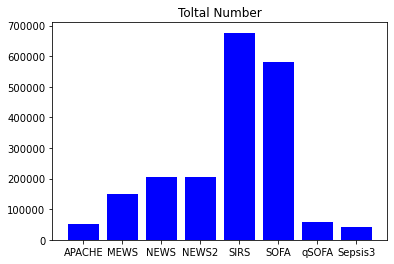

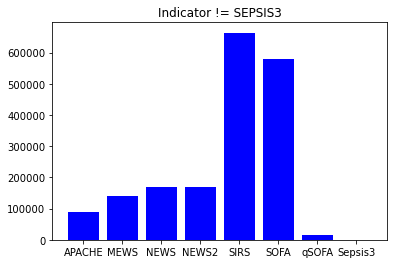

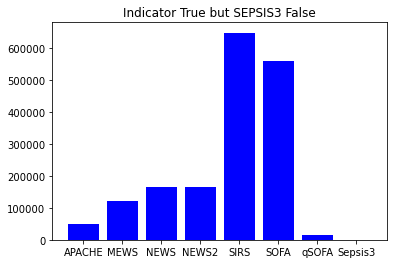

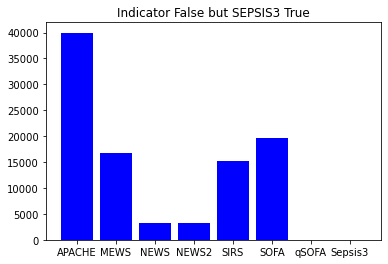

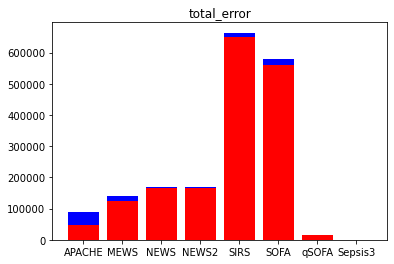

In [145]:
title = ["Toltal Number", "Indicator != SEPSIS3", "Indicator True but SEPSIS3 False", "Indicator False but SEPSIS3 True"]
for D, N in zip(ans_data2, title):
    plt.title(N)
    plt.bar(range(len(D)), list(D.values()), align='center', color="b")
    plt.xticks(range(len(D)), list(D.keys()))
    plt.savefig(f"./src/pic/with_thres_{N}.png")
    plt.show()
plt.title("total_error")
acc = list(ans_data2[2].values())
plt.bar(range(len(ans_data2[3])), list(ans_data2[2].values()), color="r", align='center')
plt.bar(range(len(ans_data2[3])), list(ans_data2[3].values()), color="b", align='center', bottom=acc)
plt.xticks(range(len(D)), list(D .keys()))
plt.savefig(f"./src/pic/with_thres_total.png")
plt.show()